# Giới thiệu Reinforcement learning (Rl) - learning to act

Reinforcement learning - học tăng cường được định nghĩa một cách tổng quan nhất là các bài toán trong đó mục tiêu là để tối đa hóa phần thưởng trong dài hạn. Ví dụ khi chơi cờ, điều mà người chơi có kinh nghiệm phải tính toán là khi đi mỗi nước cờ hoặc cụm các nước cờ bằng cách nào đấy đều phải đóng góp đến kết quả toàn cục.

<center>
<img src="https://upload.wikimedia.org/wikipedia/commons/c/cf/CaroVN.jpg" height="270">
</center>

Mô hình của DQN gồm *tác nhân (agent)* tương tác với *môi trường (environment)* tại *trạng thái (state)* thông qua các *hành động (action)* tại thời điểm $t$ và nhận về *phần thưởng (reward)*. Sau mỗi bước hành động tác nhân sẽ chuyển tiếp sang trạng thái mới. Một vòng lặp các phản ứng qua lại giữa tác nhân - môi trường được mô phỏng như hình sau:

<center>
<img src="https://miro.medium.com/max/904/1*WOYVzYnF-rbdcgZU2Wt9Yw.png" height="200">
</center>

Trong đó:

- Trạng thái thể hiện tình trạng của tác nhân và môi trường tại thời điểm $t$.

- Tập hợp bộ hành động tác nhân có thể làm tại mỗi trạng thái.

- Tập hợp bộ phần thưởng cho từng trạng thái - hành động.

***Tổng quan là:***

> *Với trạng thái hiện tại, bộ hành động và tập hợp các phần thưởng tương ứng đã được quy định trước, máy sẽ học cách chọn ra hành động để tối đa hóa phần thưởng nhận được trong tương lai.*

Vậy chắc chắn là ở đây đang tồn tại 1 cái hàm nào đó có đầu vào đầu ra. Đầu vào bao gồm các trạng thái, bộ action có thể thực hiện tại từng trạng thái, reward cho mỗi cặp trạng thái - hành động. Còn đầu ra là hành động nên làm.

Và cái hàm mà nhận vào 1 bảng (ta gọi là bảng *Q-value*) và trả ra hành động tương ứng gọi là *hàm chiến lược (policy)*, ký hiệu là $\pi$. 

***Như vậy:***

> *Thuật toán sẽ đi tìm hàm chiến lược tối ưu kia. Tối ưu dựa trên tiêu chí là, nó sẽ học cách tính toán hành động nào nên làm để tối đa phần thưởng nhiều nhất có thể trong tương lai.*







# Phân tích theo TEFPA

- Task: input là state, output là optimal action.

- E: 
  + Input: trạng thái hiện tại, hành động kế tiếp
  + Output: phần thưởng ở hiện tại.

- F: hàm chiến lược $\pi$. 

- P: Phương trình Bellman:

$$
Q^{target}(s_t,a_t) \approx r_t + \gamma max_{a_{t+1}}(Q(s_{t+1},a_{t+1}))
$$


$$
P = \Delta{Q} = \hat{Q}(s_t,a_t) - Q^{target}(s_t,a_t)
$$

- A:

$$
\hat{Q}(s_t,a_t) = \hat{Q}(s_t,a_t) - \eta*\Delta{Q} \\
= \hat{Q}(s_t,a_t) +\eta[r_t + \gamma max_{a_{t+1}}(Q(s_{t+1},a_{t+1})) - \hat{Q}(s_t,a_t)]
$$




# Code với game Hồ băng

Mô tả: Game hồ băng, chia làm 16 ô vuông gồm ô bắt đầu, các ô vuông có băng hoặc không băng và ô đích. Ô bắt đầu chú thích là `S`, ô có băng chú thích là `F`, ô là một cái hố chú thích là `H`, ô đích đến chú thích là `G`. Nhiệm vụ của bạn là di chuyển từ `S` đến `G`. Nếu đi lọt vào ô hố thì game over!



![alt text](https://miro.medium.com/max/884/1*MCjDzR-wfMMkS0rPqXSmKw.png)
<center>


<img src="https://miro.medium.com/max/842/1*Qp14HWQfOeE2UoSxrxCxAg.png" height="270">
</center>



### Q-values table

|State(cell)|Left|Down|Right|Up|
|---|---|---|---|---|
|00 | 0 | 0 | 0 | 0 |
|01 | 0 | 0 | 0 | 0 |
|...| 0 | 0 | 0 | 0 |
|15 | 0 | 0 | 0 | 0 |

In [ ]:
import numpy as np
import os
import time
import gym # tạo sẵn mỗi trường game cho Decision Making: taxi, Frozen Lake, Mario 
import random
from gym.envs.registration import register
np.random.seed(1612)
import matplotlib.pyplot as plt
from matplotlib.table import Table

## Load and setup the environment
env = gym.make('FrozenLake-v0', is_slippery=False) # ko có trượt, đi bước nào đúng bước đó
#To start, we need to reset to the initial (default) state
env.reset()
#Get the total number of possibles states (obervations)
states = env.observation_space.n # .n để chuyển sang data dạng số 
#Get the total number of actions available to the agent
actions = env.action_space.n

In [ ]:
#To visualize the current state
env.render()


SFFF
FHFH
FFFH
HFFG


In [ ]:
## Initialize Q-table structure
#---->TODO<----: create a table to contain expected values at given states
Q = np.zeros([states,actions]) # ngoặc [] or () bên trong thì nó tự hiểu mình quy định kiểu numpy array
Q

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])

In [ ]:
## For Q-learning
# Hyperparameters: 
epsilon = 0.99 #For the epsilon-greedy approach
gamma = 0.9 #Discount factor
eta = 0.8 #Learning rate
#The maximum amount of times we'll run the game
total_episodes = 1000

#The maximum steps we'll run for every episode 
max_steps = 100

In [ ]:
np.random.uniform(0,1)

0.0809997412036868

$$
Q^{target}(s_t,a_t) \approx r_t + \gamma max_{a_{t+1}}(Q(s_{t+1},a_{t+1}))
$$


$$
P = \Delta{Q} = \hat{Q}(s_t,a_t) - Q^{target}(s_t,a_t)
$$

- A:

$$
\hat{Q}(s_t,a_t) = \hat{Q}(s_t,a_t) - \eta*\Delta{Q} \\
= \hat{Q}(s_t,a_t) +\eta[r_t + \gamma max_{a_{t+1}}(Q(s_{t+1},a_{t+1})) - \hat{Q}(s_t,a_t)]
$$

In [ ]:
#---->TODO:
def choose_action(Q,state, epsilon):
    #Randomly generate a number between 0 and 1 and see if it's smaller than epsilon
    if np.random.uniform(0,1) < epsilon: # epsilon: thử nghiệm or khai phá : explore (mất thời gian chơi)
    #If smaller, a random action is chosen using env.action_space.sample()
      return env.action_space.sample()
    #If greater, we choose the action having the maximum value in the Q-table for that state: a.k.a best action
    return np.argmax(Q[state, :]) # epsilon: khai phá: exploit ---> tại state đó, act nào lớn nhất thì lấy

#---->TODO: code Q-learning based on Q formula
#input: old_value: Q[s,a] 
#       max_value_of_next_state: max(a') Q[s',a'] 
#output: new_value: Q[s,a] updated
def update_Q(old_value, max_value_of_next_state, reward):
    Q_target = reward + gamma * (max_value_of_next_state)
    new_value = old_value - eta * (old_value - Q_target)
    return new_value

In [ ]:
## Start
rList = []
for episode in range(total_episodes):
    #Store the initial state using env.reset()
    state = env.reset()
    #Store the number of steps
    t = 0
    #Reduce epsilon gradually
    epsilon = max(0.01, epsilon-0.001) # sau mỗi lần chơi trừ dần epsilon đi để bớt explore

    rAll = 0
    while t < max_steps:
        # env.render()
        #---->TODO: Choose appropriate action
        action = choose_action(Q, state, epsilon)
        #After the action taken in the environment, the reward for that action and next_state is returned
        
        #env.step() returns a tuple
        #done (bool type) returns True if the espisode is finished
        #info (dict type) stores the extra information for debugging purposes ---> ko dùng tới
        next_state, reward, done, info = env.step(action) # .step tương tác với env (0, 1, 2, 3), next_step đã chơi rồi. Bài cũ ko có code này thì ko có tương tác nên giả lập bằng cách chèn next_step
        #---->TODO: Append reward into rList # Q Learning là bảng kì vọng
        rList.append(reward)

        #Update Q-table 
        old_value = Q[state, action]
        max_value_of_next_state = np.max(Q[next_state, :]) # từ dòng 21 do môi trường trả ra next_state # lấy max value chứ ko phải argmax value
        #---->TODO: Update Q-value by calling th function update_Q
        Q[state, action] = update_Q(old_value, max_value_of_next_state, reward)

        #Set the current state as the next state   
        state = next_state
        t += 1

        if done:
            break
    rList.append(rAll)
    # print(Q, episode, epsilon)
print(Q)

[[0.531441 0.59049  0.59049  0.531441]
 [0.531441 0.       0.6561   0.59049 ]
 [0.59049  0.729    0.59049  0.6561  ]
 [0.6561   0.       0.59049  0.59049 ]
 [0.59049  0.6561   0.       0.531441]
 [0.       0.       0.       0.      ]
 [0.       0.81     0.       0.6561  ]
 [0.       0.       0.       0.      ]
 [0.6561   0.       0.729    0.59049 ]
 [0.6561   0.81     0.81     0.      ]
 [0.729    0.9      0.       0.729   ]
 [0.       0.       0.       0.      ]
 [0.       0.       0.       0.      ]
 [0.       0.81     0.9      0.729   ]
 [0.81     0.9      1.       0.81    ]
 [0.       0.       0.       0.      ]]


In [ ]:
def play_one_game(env, policy):
  cur_state = env.reset()
  print('Starting position')
  env.render()
  while True:
    best_action = policy[cur_state]
    cur_state, reward, terminated, _ = env.step(best_action)
    env.render()
    if terminated and reward == 1:
      print('You Win!')
      break
    elif terminated and reward == 0:
      print('You Lose!')
      break

In [ ]:
play_one_game(env, policy)

Starting position

SFFF
FHFH
FFFH
HFFG
  (Down)
SFFF
FHFH
FFFH
HFFG
  (Down)
SFFF
FHFH
FFFH
HFFG
  (Right)
SFFF
FHFH
FFFH
HFFG
  (Down)
SFFF
FHFH
FFFH
HFFG
  (Right)
SFFF
FHFH
FFFH
HFFG
  (Right)
SFFF
FHFH
FFFH
HFFG
You Win!


In [ ]:
def visualize_policy(policy, terminal):
  index_to_action = {
    0:'left',
    1:'down',
    2:'right',
    3:'up'
  }
  temp = []
  for i in range(4):
    temp_1 = []
    for j in range(4):
      temp_1.append(index_to_action.get(policy[i*4+j])) # ???
    temp.append(temp_1)

  data = pd.DataFrame(temp)
  fig, ax = plt.subplots(figsize=(8,8))
  ax.set_axis_off()
  tb = Table(ax, bbox=[0,0,1,1])

  nrows, ncols = 4, 4
  width, height = 1.0 / ncols, 1.0 / nrows

  bkg_colors = ['teal' for i in range(16)]
  for pos in terminal:
    bkg_colors[pos] = 'blue'
  bkg_colors[0] = 'orange'
  bkg_colors[15] = 'green'
  bkg_colors

  # Add cells
  for (i,j), val in np.ndenumerate(data):
    # Index either the first or second item of bkg_colors based on
    # a checker board pattern
    color = bkg_colors[i*4 + j]
    if i*4+j in terminal and i*4+j!=15: # !!! 
      tb.add_cell(i, j, width, height, text='die', 
                  loc='center', facecolor=color)
    elif i*4+j==15:
      tb.add_cell(i, j, width, height, text='goal', 
                  loc='center', facecolor=color)
    else:
      tb.add_cell(i, j, width, height, text=val, 
                  loc='center', facecolor=color)

  ax.add_table(tb)
  plt.show()

In [ ]:
def planning(env, iters, Q, gamma, terminal):
  for i in range(iters):
    for state in range(Q.shape[0]):
      if state in terminal:
        continue
      for action in range(Q.shape[1]):
        Q[state, action] = 0 # label like that bcuz Q will be implemented as zeros shape (16,4) as below
        for probability, next_state, reward, terminated in env.P[state][action]:
          Q[state, action] += probability * (reward + gamma * np.max(Q[next_state])) # Bellman as below or as here: https://hackmd.io/@COTAI/RLPlanning
  return Q

In [ ]:
def get_policy_from_Q(env, Q):
  policy = np.zeros(shape=env.env.nS)
  ## YOUR CODE GOES HERE ##
  for state in range(Q.shape[0]): # no need to mention if state in terminal bcuz its wrong !!
    policy[state] = np.argmax(Q[state]) 
  ########################
  return policy.astype(np.uint8)

In [ ]:
## Visualize the movements

#---->TODO: get a list of best actions manually
import pandas as pd
actions = ["left", "down", "right", "up"]
dict_Q = {actions[0]: Q.T[0], actions[1]: Q.T[1], actions[2]: Q.T[2], actions[3]: Q.T[3]}  # visualize Q to easily understand
print(pd.DataFrame(dict_Q),"\n")

        left     down    right        up
0   0.531441  0.59049  0.59049  0.531441
1   0.531441  0.00000  0.65610  0.590490
2   0.590490  0.72900  0.59049  0.656100
3   0.656100  0.00000  0.59049  0.590490
4   0.590490  0.65610  0.00000  0.531441
5   0.000000  0.00000  0.00000  0.000000
6   0.000000  0.81000  0.00000  0.656100
7   0.000000  0.00000  0.00000  0.000000
8   0.656100  0.00000  0.72900  0.590490
9   0.656100  0.81000  0.81000  0.000000
10  0.729000  0.90000  0.00000  0.729000
11  0.000000  0.00000  0.00000  0.000000
12  0.000000  0.00000  0.00000  0.000000
13  0.000000  0.81000  0.90000  0.729000
14  0.810000  0.90000  1.00000  0.810000
15  0.000000  0.00000  0.00000  0.000000 



In [ ]:
terminal = [5, 7, 11, 12, 15]
Q = np.zeros(shape=(env.env.nS, env.env.nA))

# YOUR CODE GOES HERE

Q = planning(env, 1000, Q, 0.8, terminal) # 100 epochs, 0.9 
print(Q.shape)
policy = get_policy_from_Q(env, Q)
print(policy.shape)

(16, 4)
(16,)


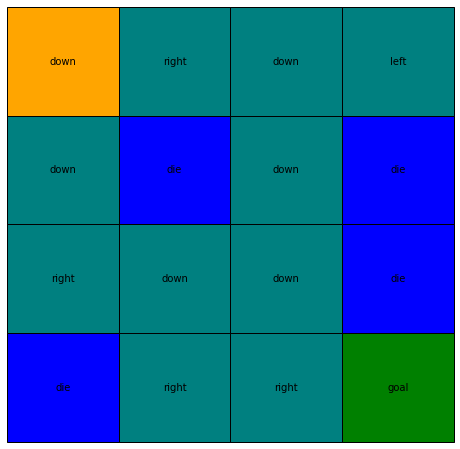

In [ ]:
#---->TODO: visualize
visualize_policy(policy, terminal)